In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
A = 15
b = 1
ddash = 1
N = 27 * np.pi / 71
m = lambda t : 1.0 / (1 + t**2) / np.pi
w = lambda t : 1.0 / (9 + t**2)
f = lambda x: (N * m(x) - ddash * w(x)) / (b + ddash * w(x))
K = lambda x, y, citer: m(x + y) * citer / (1 + ddash * w(x) / b)

In [3]:
def neumann(m, w, b = 1, ddash = 1, A = 15, iters = 100, n = 2000):
    rng = np.linspace(-A, A, n)
    fconst = np.array(f(rng))
    buf = fconst
    c = fconst
    Kbuf = np.zeros((n, n))

    for current in tqdm(range(iters)):
        for i in range(n):
            Kbuf[i] = K(rng[i], rng, buf)
        buf = np.trapz(Kbuf, rng)
        c += buf
    return c

100%|██████████| 100/100 [00:06<00:00, 15.70it/s]


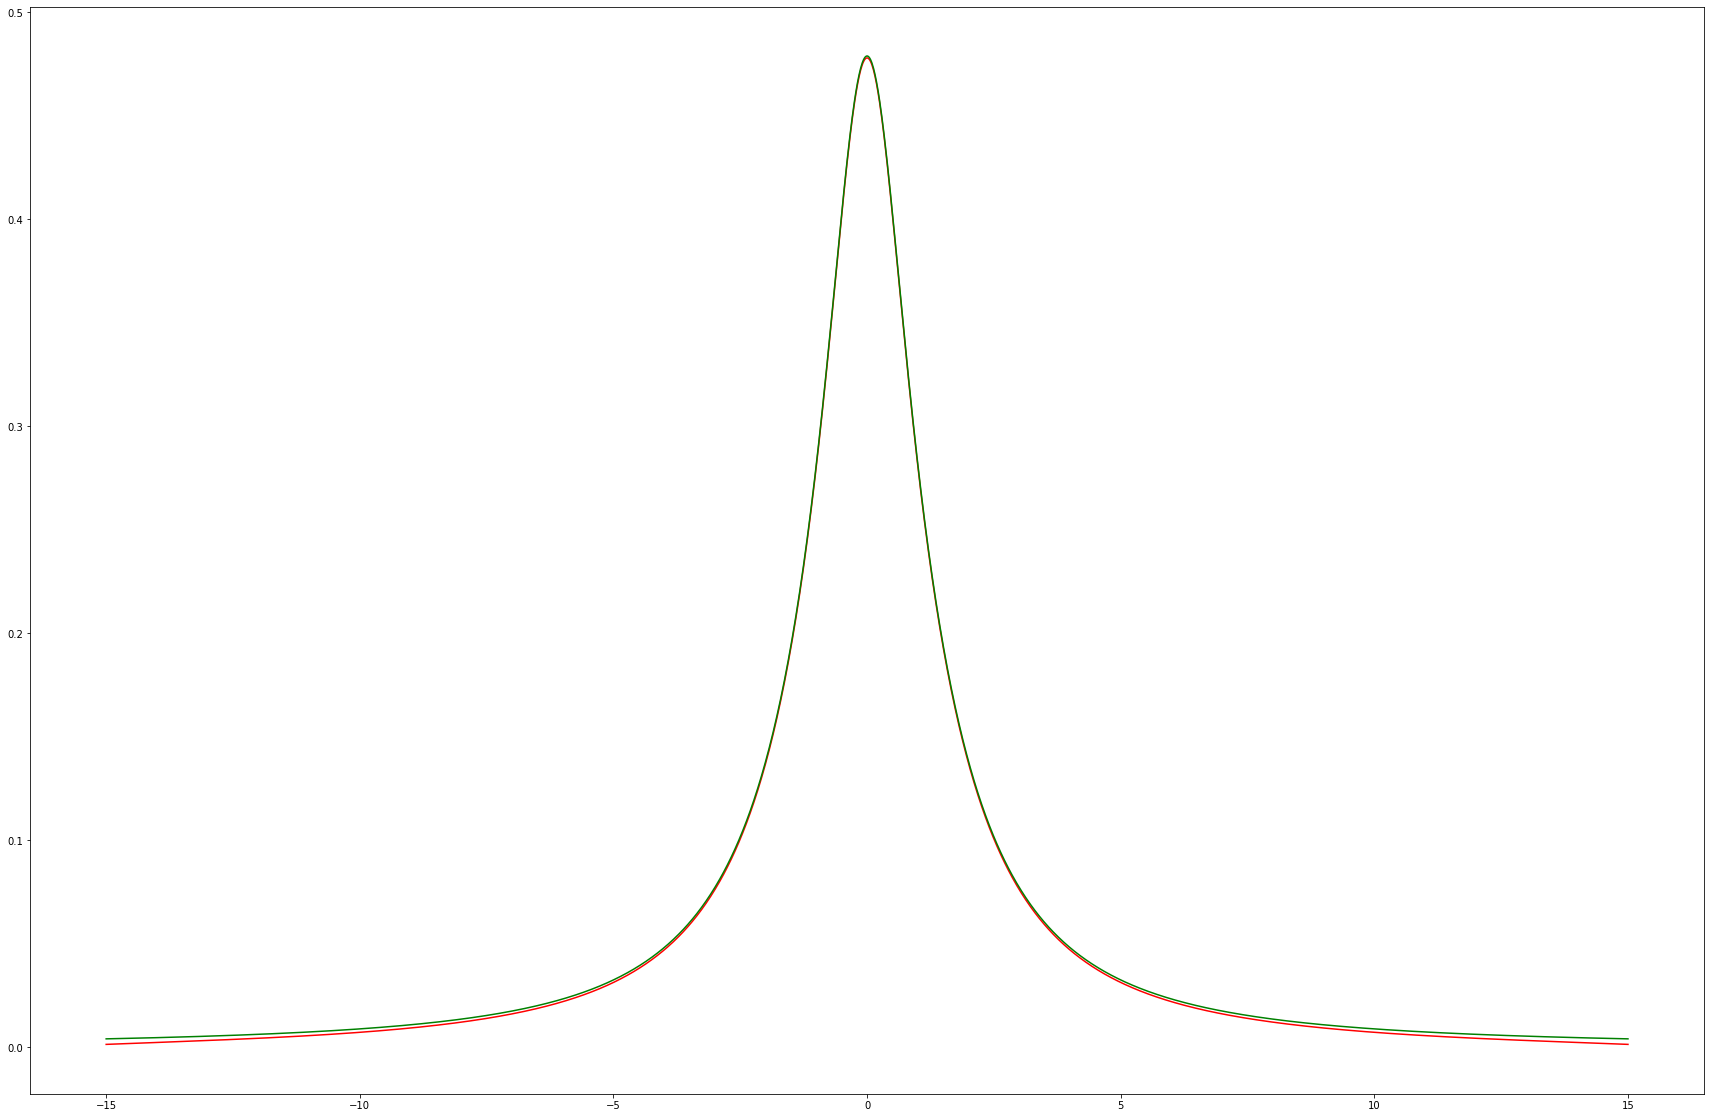

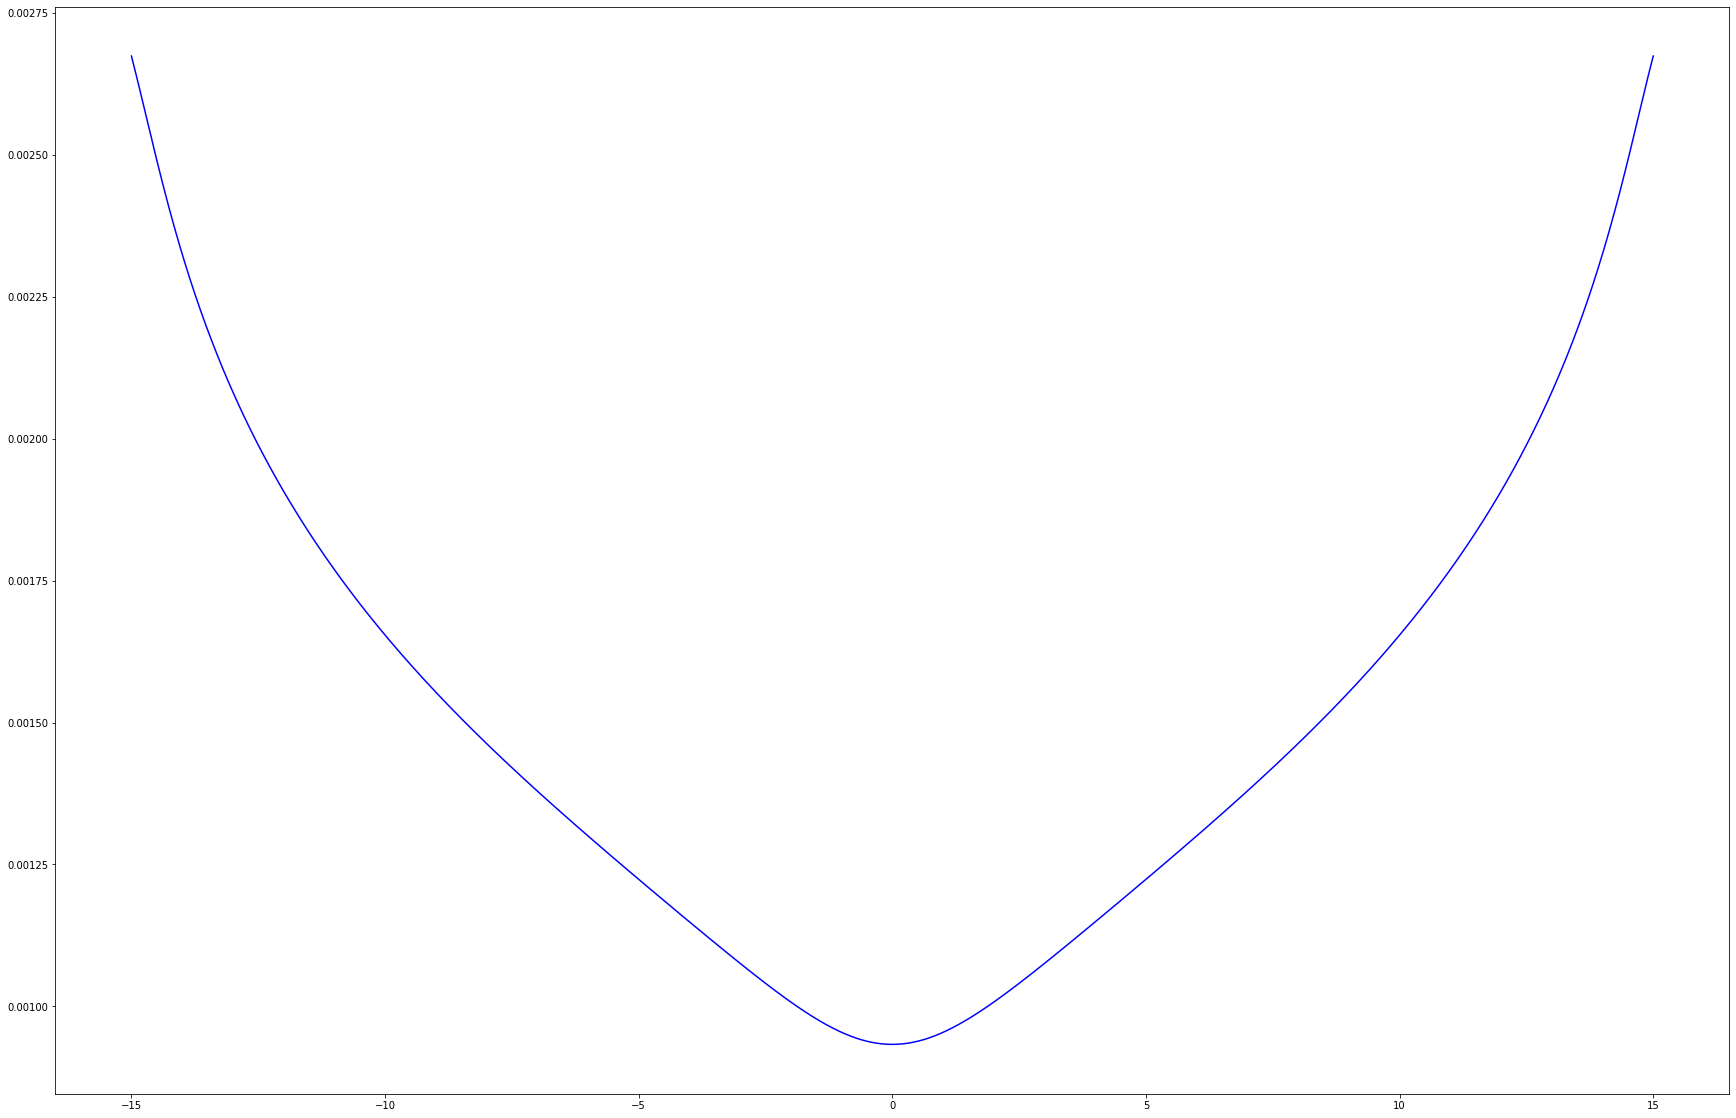

In [4]:
solution = neumann(m, w)
rng = np.linspace(-A, A, 2000)
truec = 24 / 71 / (rng**2 + 1) + 40 / 71 / (rng**2 + 4)
plt.figure(figsize=(30, 20))
plt.plot(rng, solution, "r")
plt.plot(rng, truec, "g")
plt.figure(figsize=(30, 20))
plt.plot(rng, abs(truec - solution), "b")
plt.show()